# **Case Avançado Hype 2024.1**

## Introdução 

Os membros da diretoria do Hype, de vez em quando, escolhem um jogo para jogarem juntos. O jogo escolhido da vez foi "Pokémon Omega Ruby / Alpha Sapphire", mais comumente chamado de "Pokémon ORAS".

Uma das atividades mais queridas entre os jogadores de Pokémon está a captura de todos os monstrinhos, porém trata-se de uma tarefa bem árdua dependendo do jogo da franquia. No caso de ORAS, estamos falando de mais de 700 pokémon.

Tendo em vista a dificuldade de capturar mais de 700 pokémon, os membros da diretoria decidiram dividir entre eles os pokémon para serem capturados. De forma que, juntando o pokémon de todos eles, teriam todos os pokémon do jogo. Porém, como fazer essa divisão?  

Durante uma confraternização do Hype, a diretoria citou o desafio da divisão dos pokémon entre os outros membros do Hype, porém ninguém soube dar uma boa resposta para a pergunta. Após alguns dias, chegou um email misterioso na caixa de entrada do Hype com um conjunto de dados que havia as características dos pokémon e quem deveria capturar aquele pokémon.

Os membros da diretoria, estupefatos com a mensagem, começaram a se perguntar qual era a lógica por trás daquela divisão e, caso aquela divisão fosse coerente, como eles poderiam criar um classificador para usar em aventuras pokémon futuras. 

## Instruções

O case tem como objetivo verificar se o candidato tem conhecimento o suficiente para fazer um projeto de classificação de dados utilizando algoritmos de Machine Learing. O notebook abaixo dá as instruções do que deve ser feito em cada etapa do projeto.

Você deve escrever seus códigos nas células indicadas. Pode inserir quantas célular achar necessário, mas não altere a ordem das resoluções.

Além da corretude, será avaliado também a organização e a lógica utilizada. O candidato deve deixar claro os motivos das escolhas que fizer no projeto (porque aplicou algum tratamento, algoritmo ou por que utilizou as variáveis que utilizou).

Entregas incompletas também serão aceitas. Os avaliadores irão analisar cada situação, então se não conseguir fazer tudo recomendamos que submeta o case mesmo assim.

### Sua tarefa para esse case

Sua tarefa consiste em entender o conjunto de dados e criar um classificador que consiga indicar qual membro da gestão deve capturar um pokémon. Para isso, seu trabalho será divido em 5 tarefas:

1. "Responda as questões": responda algumas perguntas de análise premilinar sobre o conjunto de dados utilizando pandas e numpy.

2. "Visualização dos dados": crie gráficos que respondam algumas questões sobre o conjunto de dados 

3. "Preparação de dados": faça a limpeza e preparação dos dados; testar métodos de normalização e padronização, conforme necessário. Além disso, deve discutir e/ou abordar o tratamento de dados ausentes e duplicados.

4. "Aplicação e otimização do modelo": crie um classicador que consiga indicar com base nas características do pokémon quem deveria capturá-lo, detalhando o processo de treinamento.

5. "Avaliação": avalie o classificador criado, utilizando diferentes métricas de avaliação. A interpretação dos resultados deve ser clara, permitindo que se compreenda o desempenho do modelo em diferentes aspectos.

Mais detalhes das tarefas estão no decorrer do notebook.

### Sobre o Conjunto de Dados 

O dataset possui as seguintes colunas:


- #: Número de indentificação do pokémon 
- Name: Nome do pokémon
- Type 1: Tipo primário do pokémon
- Type 2: Tipo secundário do pokémon
- HP: "hit points", ou seja, a quantidade de dano que o pokémon pode sofrer antes de ser derrotado 
- Attack: poder de ataque do pokémon
- Defense: poder de defesa do pokémon
- SP Atk: poder de ataque especial do pokémon
- SP Def: poder de defesa especial do pokémon
- Speed: determina qual pokémon ataca primeiro em cada rodada
- Total: soma de todos os stats do pokémon. Stats são o HP, Attack, Defense, Sp. Atk, Sp. Def e Speed
- Generation: geração do pokémon. Ao lançar um novo jogo principal de pokémon, vem uma nova leva de Pokémon que formam uma nova geração. Temos 6 gerações contempladas nesse conjunto.
- Legendary: indica se o pokémon é lendário ou não.
- Dono: um indicativo de quem deveria capturar o pokémon dentre os membros da diretoria do Hype.


## Setup 

Antes de iniciar as tarefas, vamos setar algumas coisas:

Na célula abaixo, importe todas as bibliotecas que você utilizará no case. Não faça imports fora além dessa célula, por favor.

In [58]:
# coloque aqui os seus import

## Imports de ETL e visualização
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


## Imports de Machine learning
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Abaixo há a leitura do conjunto de dados. Não leia nenhum conjunto de dados além desse e não altere a forma de leitura do dataset.

In [3]:
# leitura do dataset
pkmn = pd.read_csv('dataset/pokemon_hype.csv')

In [4]:
# visualização das 5 primeiras linhas
pkmn.head()

,Unnamed: 0,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Dono
0,0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False,Thomaz
1,1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False,Becky
2,2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False,Becky
3,3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False,Isa
4,4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False,Thomaz


## Tarefas

Abaixo, em cada seção, realize as tarefas. Boa sorte!!!

### **Seção 1: Respondas as questões**

Com base no conjunto de dados, responda as perguntas abaixo utilizando Pandas ou Numpy para obter os resultados. Coloque seu código na célula marcada com "### Seu código" e sua resposta após o "Resposta". Fique a vontade para criar mais células para o seu código caso ache necessário.

O item "a" é um exemplo de resposta

#### a. Dentre os pokémon de Fogo como 'Type 1', qual porcentagem deles são lendários? (Exemplo)

In [5]:
### Seu código
pkmn_fogo = pkmn[pkmn['Type 1'] == 'Fire']
pkmn_fogo_lendario = pkmn_fogo[pkmn['Legendary'] == 1]

len(pkmn_fogo_lendario)/len(pkmn_fogo)

C:\Users\salaseach\AppData\Local\Temp\ipykernel_13428\1870846260.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pkmn_fogo_lendario = pkmn_fogo[pkmn['Legendary'] == 1]


0.09615384615384616

Resposta: aproximadamente 0.096

#### b. Quantos pokémon existem com o tipo primário ("Type 1") "Fire" ? E como tipo segundário? 

In [6]:
### Seu código
print(f"Existem {len(pkmn_fogo)}, com o tipo primário")

Existem 52, com o tipo primário


In [7]:
### Seu código
pkmn_fogo_secundario = pkmn[pkmn['Type 2'] == 'Fire']
print(f"E {len(pkmn_fogo_secundario)}, com o tipo secundário.")

E 12, com o tipo secundário.


#### c. Dentre os pokémon da 5ª geração que não possuem tipo fogo como tipo primário, nem como tipo secundário, qual possui a maior defesa?

In [8]:
### Seu código
pkmn_gen5 = pkmn[pkmn['Generation'] == 5]
pkmn_gen5_naofogo = pkmn_gen5[(pkmn_gen5['Type 1'] != 'Fire') & (pkmn_gen5['Type 2'] != 'Fire')]
pkmn_gen5_naofogo_maior_defesa = pkmn_gen5_naofogo[pkmn_gen5_naofogo['Defense'] == pkmn_gen5_naofogo['Defense'].max()]

print(f"O pokemon é o {pkmn_gen5_naofogo_maior_defesa.Name.iloc[0]} com {pkmn_gen5_naofogo_maior_defesa.Defense.iloc[0]} de defesa.") 


O pokemon é o Cofagrigus com 145 de defesa.


#### d. Qual a geração de pokémon que possui a maior média de ataque entre os lendários?

In [9]:
### Seu código
geracoes = pkmn[pkmn["Legendary"] == 1].groupby('Generation')
media_ataque_geracoes = geracoes[['Attack','Sp. Atk']].mean()
geracao_com_maior_ataque = media_ataque_geracoes.mean(axis=1).idxmax()

print(f"A geração é a {int(geracao_com_maior_ataque)}") 

A geração é a 1


#### e. Em relação aos donos dos pokémon, responda as seguintes perguntas:
- Qual dono tem a maior média entre os "total" dos pokémon?
- Qual dono possui mais pokémon lendários?
- Escolha um dos donos e diga qual geração ele possui mais pokémon.

In [10]:
### Seu código
donos = pkmn.groupby('Dono')
dono_com_maior_media_total = donos['Total'].mean().idxmax()
print(dono_com_maior_media_total)


Isa


In [11]:
### Seu código
dono_com_mais_lendarios = donos['Legendary'].sum().idxmax()
print(dono_com_mais_lendarios)

Isa


In [12]:
### Seu código

## Vou escolher a Isa!!!
Isa = donos.get_group('Isa')
geracoes_isa = Isa.groupby('Generation')
geracao_mais_pokemon_isa = geracoes_isa.count().idxmax()

int(geracao_mais_pokemon_isa.iloc[0])


3

### **Seção 2: Visualização de Dados**

Nessa seção, crie gráficos que respondam as seguintes perguntas:

a. Quais variáveis são mais correlacionadas?

b. Escolha 1 stat e responda a seguinte pergunta: a distribuição desse stat varia dependendo do dono? Dica: utilize box-plots ou histogramas.

c. Escolha 2 stats (pode repetir o da pergunta anterior) e responda a seguinte pergunta: considerando esses 2 stats, é possível distinguir através do gráfico os donos? Dica: utilize graficos de dispensão.

Fique a vontade para usar quantos gráficos achar necessário para responder as perguntas. Você pode usar 1 ou diversos gráficos para responder. Também fique a vontade para criar gráficos que descrevam o conjunto de dados além das perguntas feitas. Sugerimos as bibliotecas matplotlib e seaborn.

Além dos gráficos, é importante que escreva a sua interpretação do gráfico e o que ele diz sobre a pergunta feita.

#### Pergunta a.

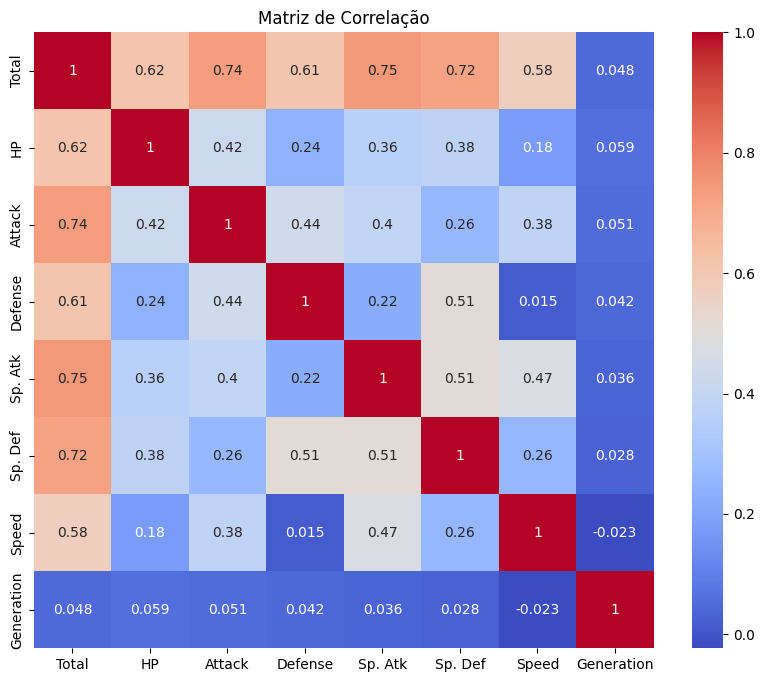

In [30]:
### Seu código
variaveis_selecionadas = ['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']
corr = pkmn[variaveis_selecionadas].corr()


plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', cbar=True)
plt.title('Matriz de Correlação')
plt.show()

#### Pergunta b.

Stat escolhido: HP


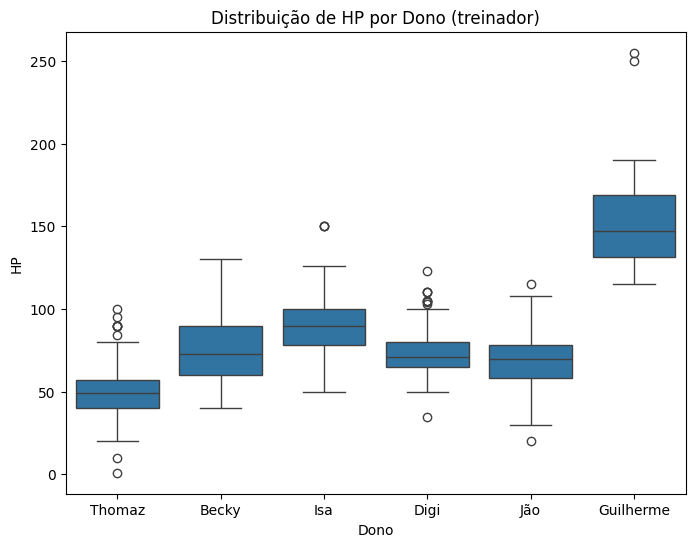

Sim, guilherme possui os Pokemóns com o HP mais alto e Thomaz os com menos HP.


In [14]:
### Seu código
print("Stat escolhido: HP")

plt.figure(figsize=(8,6))
sns.boxplot(data=pkmn, x="Dono", y="HP")
plt.title("Distribuição de HP por Dono (treinador)")
plt.show()

print("Sim, guilherme possui os Pokemóns com o HP mais alto e Thomaz os com menos HP.")

#### Pergunta c.

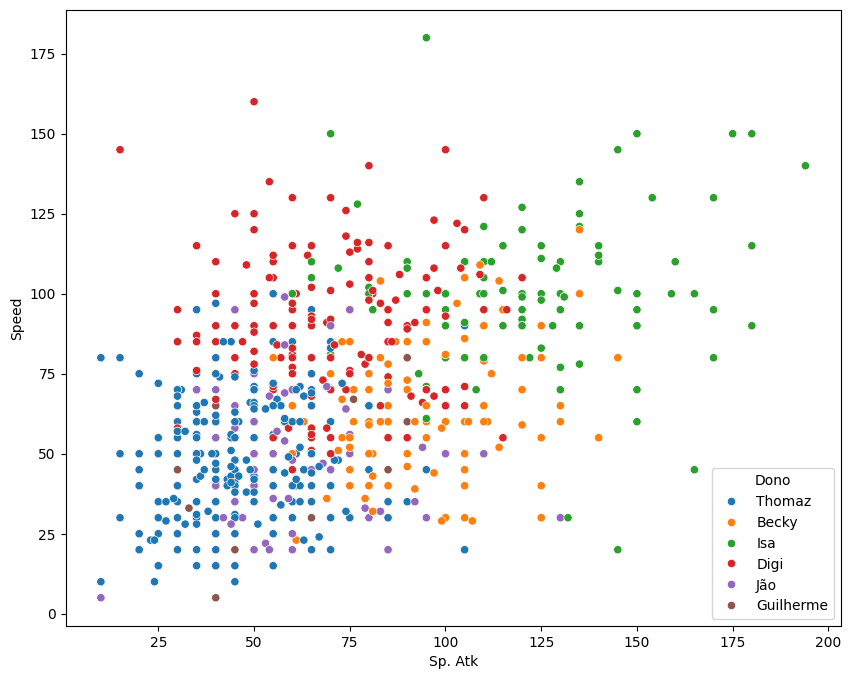

Sim, o gráfico mostra a dispersão dos atributos Speed e Sp. Atk, distinguidos por dono. É possível perceber que cada dono possui pokémons que tendem a ter determinado intervalo de cada stat, como por exemplo o Thomaz, que seus pokemons tem seus intervalos de Speed e Sp. Atk baixos, não precisamente entre 10 e 100, enquanto outros treinadores possuem outros intervalos específicos, onde suas concentrações de ocorrencias são maiores.


In [15]:
### Seu código
plt.figure(figsize=(10,8))
sns.scatterplot(data=pkmn, x='Sp. Atk', y='Speed', hue='Dono')
plt.show()

print("Sim, o gráfico mostra a dispersão dos atributos Speed e Sp. Atk, distinguidos por dono. É possível perceber que cada dono possui pokémons que tendem a ter determinado intervalo de cada stat, como por exemplo o Thomaz, que seus pokemons tem seus intervalos de Speed e Sp. Atk baixos, não precisamente entre 10 e 100, enquanto outros treinadores possuem outros intervalos específicos, onde suas concentrações de ocorrencias são maiores.")


### **Seção 3: Preparação de dados**

Antes de implementar o seu modelo de machine learning, faça o pré-processamento necessário para os seus dados. Tópicos importantes a serem resolvidos nessa seção são: 

- Tratamento de dados nulos
- Normalização de variáveis numéricas
- Transformação de variáveis categoricas em numéricas 
- Seleção de features

Não necessáriamente os tópicos acima devem ser resolvidos. Pode ser que o algoritmo de machine learning que você escolha não necessite dos tratamentos acima para funcionar ou para melhorar o desempenho. Porém, caso fosse necessário e você não realizou o tratamento, será descontado pontos.

Além dos tópicos acima, faça os tratamentos que julgar necessário.

#### Dados nulos

In [21]:
### Seu código

pkmn_sem_nulos = pkmn.fillna("0")

#### One hot encoding

In [ ]:
### Seu código
hot_encoded_tipo1 = pd.get_dummies(pkmn_sem_nulos, columns=['Type 1'])
final_hot_encoded = pd.get_dummies(hot_encoded_tipo1, columns=['Type 2'])

,Unnamed: 0,#,Name,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Type 2_Ghost,Type 2_Grass,Type 2_Ground,Type 2_Ice,Type 2_Normal,Type 2_Poison,Type 2_Psychic,Type 2_Rock,Type 2_Steel,Type 2_Water
0,0,1,Bulbasaur,318,45,49,49,65,65,45,...,False,False,False,False,False,True,False,False,False,False
1,1,2,Ivysaur,405,60,62,63,80,80,60,...,False,False,False,False,False,True,False,False,False,False
2,2,3,Venusaur,525,80,82,83,100,100,80,...,False,False,False,False,False,True,False,False,False,False
3,3,3,VenusaurMega Venusaur,625,80,100,123,122,120,80,...,False,False,False,False,False,True,False,False,False,False
4,4,4,Charmander,309,39,52,43,60,50,65,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795,795,719,Diancie,600,50,100,150,100,150,50,...,False,False,False,False,False,False,False,False,False,False
796,796,719,DiancieMega Diancie,700,50,160,110,160,110,110,...,False,False,False,False,False,False,False,False,False,False
797,797,720,HoopaHoopa Confined,600,80,110,60,150,130,70,...,True,False,False,False,False,False,False,False,False,False
798,798,720,HoopaHoopa Unbound,680,80,160,60,170,130,80,...,False,False,False,False,False,False,False,False,False,False


#### Normalização

In [45]:
### Seu código

# Como vou utilizar uma Decision tree como algorítmo de ML, não preciso de normalização nesse caso com 
# esse conjunto de dados, então vou seguir sem.

pokedf = final_hot_encoded.drop('Name', axis=1)
# Remover o nome, que não vai fazer parte da predição do ML, porque uma vez que os pokemóns são únicos no
# conjunto de dados, cada pokemon está diretamente relacionado ao seu dono

# Também nome não é uma variável classificatória!

#### Seleção de features

In [39]:
### Seu código

# features = pf[['Total', 'HP', 'Attack', 'Defense', 'Sp. Atk', 'Sp. Def', 'Speed', 'Generation']]
features = pokedf.drop('Dono', axis=1)
label = pokedf['Dono']


### **Seção 4: Aplicação e Otimização do modelo**

Nessa seção, você deverá criar, treinar e testar um classificador que prediz o dono com base nas características do pokémon. Para isso, você deverá:

- Dividir o conjunto em treino e teste.
- Escolher um algoritmo de machine learning. Exemplos: Random Forest, KNN, Decision Tree, MLP.
- Treinar o modelo com os dados de treino.
- Predizer a label a partir das features de teste.
- Utilizar algum método para ajustar os hiperparâmetros. Discuta as melhorias obtidas.

#### Separação Treino e Teste

In [40]:
### Seu código

features_treino, features_teste, label_treino, label_teste = train_test_split(features, label, test_size=0.2, random_state=69)

#### Aplicação do modelo

In [46]:
### Seu código

modelo = DecisionTreeClassifier(random_state=69)

modelo.fit(features_treino, label_treino)

label_previsao = modelo.predict(features_teste)



#### Hyperparameter Tuning

In [59]:
### Seu código

parametros = {
    'max_depth': [3, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy'],
}

# GridSearchCV para encontrar os melhores hiperparâmetros
grid_search = GridSearchCV(estimator=modelo, param_grid=parametros, cv=5, n_jobs=-1)
grid_search.fit(features_treino, label_treino)

print("Melhores hiperparâmetros:", grid_search.best_params_)


Melhores hiperparâmetros: {'criterion': 'entropy', 'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 2}


#### **Seção 5: Avaliação**

Avaliar o desempenho do modelo é crucial. Utilize pelo menos 3 métricas para essa avaliação, detalhando-as. O que as métricas indicam sobre o desempenho do seu modelo? Dica de métricas: acurácia e revocação.

In [ ]:
### Seu código

acuracia = accuracy_score(label_teste, label_previsao)
print("Acurácia:", acuracia)

precisao = precision_score(label_teste, label_previsao, average="weighted")
print("Precisão:", precisao)

revocacao = recall_score(label_teste, label_previsao, average="weighted")
print("Revocação:", revocacao)

matriz_confusao = confusion_matrix(label_teste, label_previsao)
print("Matriz de Confusão:\n", matriz_confusao)


Acurácia: 0.925
Precisão: 0.9265549660034955
Revocação: 0.925
Matriz de Confusão:
 [[28  2  0  2  0  1]
 [ 4 33  0  0  0  0]
 [ 0  0  2  0  0  0]
 [ 0  0  0 25  0  0]
 [ 1  0  0  0 10  1]
 [ 1  0  0  0  0 50]]
